In [1]:
# Sample API
import flowx
import simulation
import numpy
flowx.__version__

'0.1.dev'

In [2]:
# Define grid parameters
nx, ny = 40, 40

xmin, xmax = 0.0, 2.0*numpy.pi
ymin, ymax = 0.0, 2.0*numpy.pi

# Define cell-centered variable names
center_vars = ['pres', 'divv', 'asol', 'eror']
face_vars   = ['velc', 'hvar', 'asol', 'eror']

# Define boundary conditions for variable pressure and velocity [left, right, bottom, top]
bc_type_pres = {'pres': ['neumann', 'neumann', 'neumann', 'neumann']}
bc_val_pres  = {'pres': [0.0, 0.0, 0.0, 0.0]}

bc_type_u = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_u  = {'velc': [0.0, 0.0, 0.0, 0.0]}

bc_type_v = {'velc': ['dirichlet', 'dirichlet', 'dirichlet', 'dirichlet']}
bc_val_v  = {'velc': [0.0, 0.0, 0.0, 0.0]}

# Create the grid and data
gridc = flowx.Grid('cell-centered', center_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_pres, user_bc_val=bc_val_pres)

gridx = flowx.Grid('x-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_u, user_bc_val=bc_val_u)

gridy = flowx.Grid('y-face', face_vars,
                    nx, ny, xmin, xmax, ymin, ymax,
                    user_bc_type=bc_type_v, user_bc_val=bc_val_v)

scalars = flowx.Scalars(tmax=2, dt=0.001, Re=1.0)

simulation.update_bc_val(gridx, gridy, 'velc', scalars.variable['to'])

In [3]:
simulation.get_initial(gridc, gridx, gridy, 'velc', 'pres')

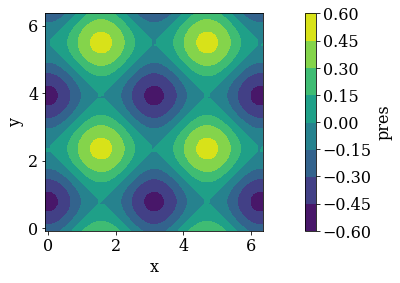

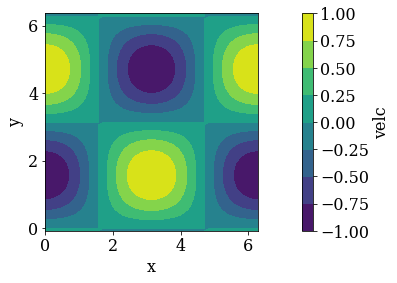

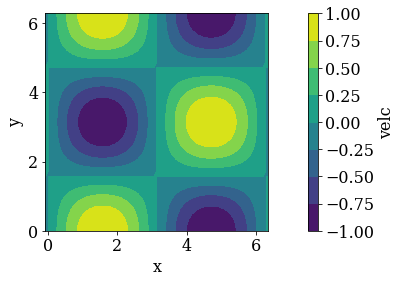

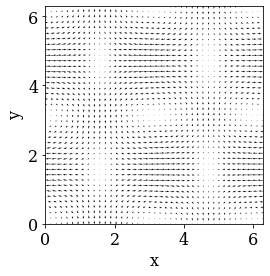

In [4]:
flowx.io.plot_contour(gridc, 'pres')
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridy, 'velc')
flowx.io.plot_vector(gridx, gridy, 'velc')

In [5]:
ins_vars = ['velc', 'hvar', 'divv', 'pres']

while scalars.variable['time'] <= scalars.variable['tmax']:
    
    # Update the time-dependent boundary condition value
    simulation.update_bc_val(gridx, gridy, 'velc', scalars.variable['time'])
    
    # Predictor Step
    flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'predictor_step1')
    
    # Divergence Step
    flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'divergence_step1')
    
    # Solve the pressure Poisson equation 
    scalars.stats['ites'], scalars.stats['res'] = flowx.poisson.solve_jacobi(gridc, 'pres', 'divv',
                                                                       maxiter=10000, tol=1e-9)
    # Corrector Step
    flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'corrector_step1')
    
    
    
    # Predictor Step
    flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'predictor_step2')
    
    # Divergence Step
    flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'divergence_step2')
    
    # Solve the pressure Poisson equation 
    scalars.stats['ites'], scalars.stats['res'] = flowx.poisson.solve_jacobi(gridc, 'pres', 'divv',
                                                                       maxiter=10000, tol=1e-9)
    # Corrector Step
    flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'corrector_step2')
    
    
    
    # Predictor Step
    flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'predictor_step3')
    
    # Divergence Step
    flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'divergence_step3')
    
    # Solve the pressure Poisson equation 
    scalars.stats['ites'], scalars.stats['res'] = flowx.poisson.solve_jacobi(gridc, 'pres', 'divv',
                                                                       maxiter=10000, tol=1e-9)
    # Corrector Step
    flowx.ins.advance_rk3(gridc, gridx, gridy, scalars, ins_vars, 'corrector_step3')
    
    
    
    # Display stats
    if scalars.variable['nstep'] % 10 == 0:
        flowx.io.display_stats(scalars)   
    
    scalars.advance()

NameError: name 'predictor_step1' is not defined

In [ ]:
simulation.get_analytical(gridc, gridx, gridy, 'asol', scalars.variable['time'])

In [ ]:
flowx.io.plot_contour(gridx, 'velc')
flowx.io.plot_contour(gridx, 'asol')
flowx.io.plot_contour(gridc, 'divv')

In [ ]:
gridx.get_error('eror','velc','asol')
gridy.get_error('eror','velc','asol')

In [ ]:
flowx.io.plot_contour(gridx, 'eror')
flowx.io.plot_contour(gridy, 'eror')

In [ ]:
gridy.get_l2_norm('eror')

In [ ]:
l2_norm